In [1]:
import os
from decouple import config
import fNeuro.second_level.second_level_functions as slf
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from IPython.display import display
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests as multitest

In [2]:
sig_clusters = ['eft_interaction', 'happy_interaction', 'fear_time']
parameter_estimates = {}
for task_contrast in sig_clusters:
    print('working on task and contrast: ', task_contrast)
    task = task_contrast.split('_')[0]
    contrast = task_contrast.split('_')[1]
    base_dir = config(task)
    path = os.path.join(base_dir, '2ndlevel')
    copes_dir = os.path.join(base_dir, '2ndlevel', 'mixed_model')
    parameter_estimates_df = slf.get_peak_voxel(base_dir, path, copes_dir, contrast)
    parameter_estimates[task_contrast] = parameter_estimates_df

working on task and contrast:  eft_interaction
working on task and contrast:  happy_interaction
working on task and contrast:  fear_time


In [3]:
an_t1_eft = parameter_estimates['eft_interaction'][(parameter_estimates['eft_interaction']['time_point']=='t1') & (parameter_estimates['eft_interaction']['group']=='AN'
                                                                                                    )].reset_index(drop=True)
an_t2_eft = parameter_estimates['eft_interaction'][(parameter_estimates['eft_interaction']['time_point']=='t2') & (parameter_estimates['eft_interaction']['group']=='AN'
                                                                                                    )].reset_index(drop=True)
an_t1_happy = parameter_estimates['happy_interaction'][(parameter_estimates['happy_interaction']['time_point']=='t1') & (parameter_estimates['happy_interaction']['group']=='AN'
                                                                                                    )].reset_index(drop=True)
an_t2_happy = parameter_estimates['happy_interaction'][(parameter_estimates['happy_interaction']['time_point']=='t2') & (parameter_estimates['happy_interaction']['group']=='AN'
                                                                                                    )].reset_index(drop=True)
neuroimaging_behavioural_measures = pd.read_csv(os.path.join(config('task_fmri'), 'neuroimaging_behavioural_measures.csv'))
an_behavioural_data = neuroimaging_behavioural_measures[neuroimaging_behavioural_measures['t1'].str.contains('G2')].drop(index=76).reset_index(drop=True)
an_behavioural_data['age_change'] = an_behavioural_data['age_t2'] - an_behavioural_data['age_t1']
an_eft = pd.concat((an_t1_eft, an_t1_eft), axis=0)
an_happy = pd.concat((an_t1_happy, an_t1_happy), axis=0)
an_corr = pd.concat((an_behavioural_data, an_behavioural_data))

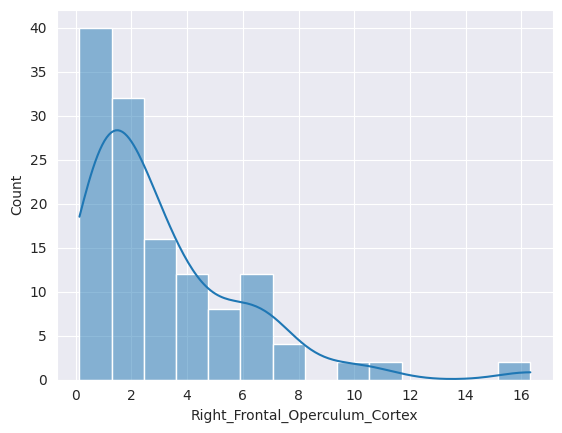

NormaltestResult(statistic=63.828012486197224, pvalue=1.3801401594326503e-14)

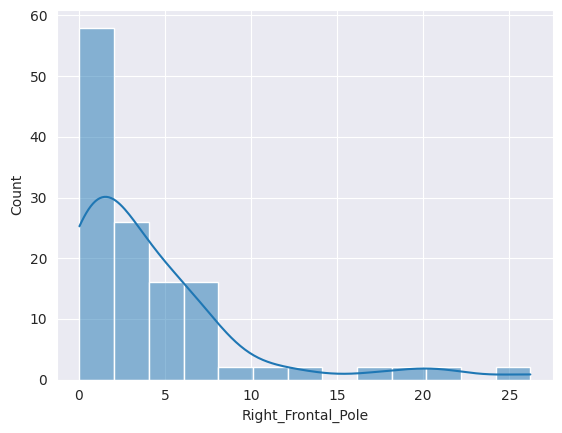

NormaltestResult(statistic=76.96360103234198, pvalue=1.9389489826092142e-17)

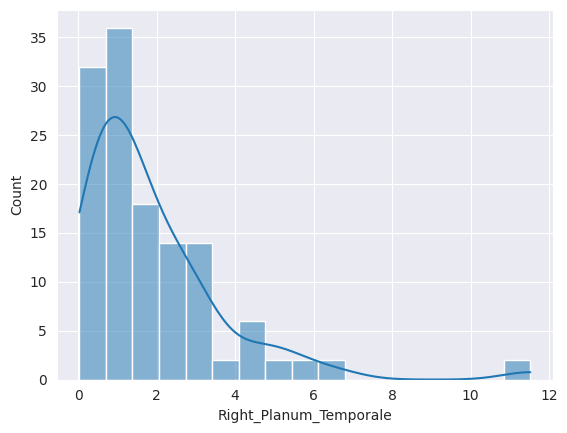

NormaltestResult(statistic=92.35528895692644, pvalue=8.81665436544624e-21)

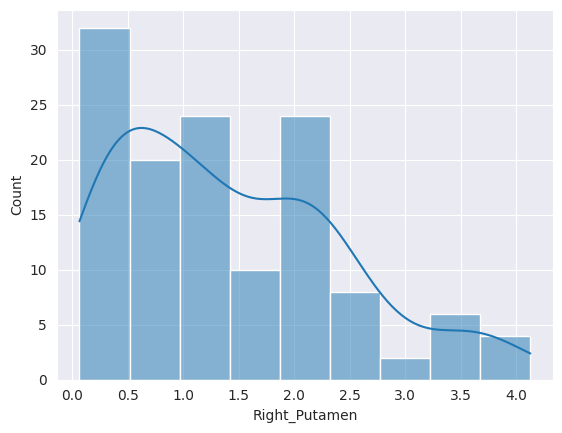

NormaltestResult(statistic=10.16316869776362, pvalue=0.006210062312414801)

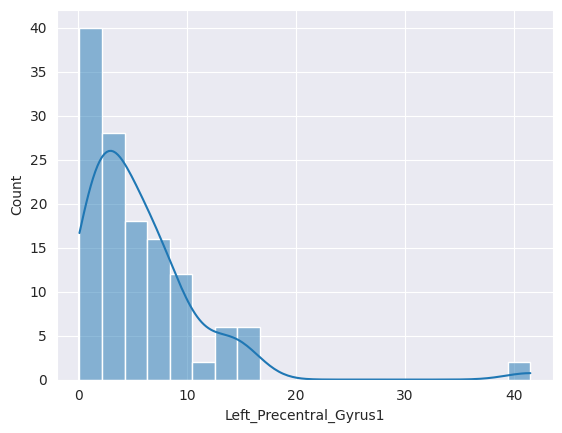

NormaltestResult(statistic=128.85095481067822, pvalue=1.048022650244659e-28)

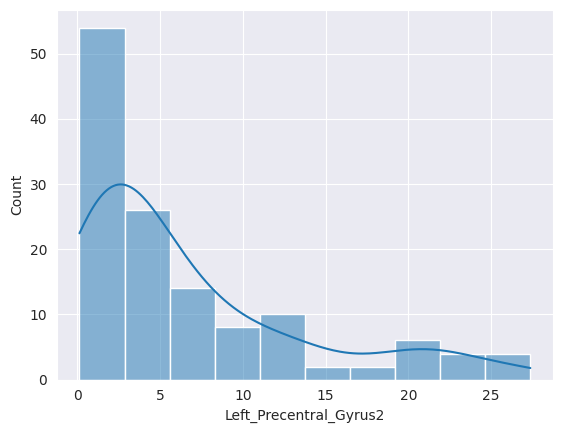

NormaltestResult(statistic=32.16870527901544, pvalue=1.0343187644914712e-07)

In [4]:
for col in an_eft.iloc[:,4:]:
    sns.histplot(an_eft[col], kde=True)
    plt.show()
    display(stats.normaltest(an_eft[col]))

In [5]:
correlations = {
    'eft_change':{},
    'happy_change':{},
}

for col in an_eft.iloc[:,4:].columns:
    correlations['eft_change'][col] = slf.correlation(volume=an_eft, 
                            behaviour=an_corr[['edeq_change_score', 'anxiety_change_score', 'depression_change_score','bmi_change_score', 'age_change']], 
                            volume_name=col) 

correlations['happy_change']['vermis'] = slf.correlation(volume=an_happy, 
                            behaviour=an_corr[['edeq_change_score', 'anxiety_change_score', 'depression_change_score','bmi_change_score', 'age_change']], 
                            volume_name='Vermis_4_5') 

In [6]:
pvals = []
for key in  correlations.keys():
    for region in correlations[key]:
          pvals.append(correlations[key][region]['pvalues'].values())
pvalues = [pval for pval_nested_list in pvals for pval in pval_nested_list]
print(multitest(pvalues))

(array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False]), array([0.99999995, 0.88003633, 0.88003633, 0.98354583, 0.9999998 ,
       0.99997336, 0.93141291, 0.45810354, 0.9999998 , 0.99995074,
       0.93371611, 0.9999998 , 0.98354583, 0.99999995, 0.67553639,
       0.99999242, 0.99997336, 0.99999995, 0.99999995, 0.99999995,
       0.99999995, 0.28830978, 0.92335152, 0.99999242, 0.99999995,
       0.99999242, 0.99999995, 0.9999952 , 0.97274456, 0.99999995,
       0.99999995, 0.99999995, 0.99999995, 0.89284519, 0.97274456]), 0.0014644493428053185, 0.0014285714285714286)


In [7]:
for key in correlations['eft_change'].keys():
    for measure in correlations['eft_change'][key]['pvalues'].keys():
        if correlations['eft_change'][key]['pvalues'][measure] < 0.05:
            print(key, measure)
            print('p-value: ', correlations['eft_change'][key]['pvalues'][measure])
            print('Correlations: ', correlations['eft_change'][key]['correlation'][measure])
            print('BFB: ', correlations['eft_change'][key]['bayesian'][measure]['BFB'])
            print('null_hypothesis_probabilty (%): ', correlations['eft_change'][key]['bayesian'][measure]['null_hypothesis_probabilty'])
            print('alternative_hypothesis_probabilty (%): ', correlations['eft_change'][key]['bayesian'][measure]['alternative_hypothesis_probabilty'])
            print('odds: ', correlations['eft_change'][key]['bayesian'][measure]['odds'], '\n')

Right_Frontal_Pole depression_change_score
p-value:  0.017858620328084454
Correlations:  0.21591980319456788
BFB:  5.117557251228736
null_hypothesis_probabilty (%):  16.3464
alternative_hypothesis_probabilty (%):  83.6536
odds:  6.117557251228736 

Right_Planum_Temporale age_change
p-value:  0.03353340351728543
Correlations:  0.18659236218638017
BFB:  3.2311776061574617
null_hypothesis_probabilty (%):  23.6341
alternative_hypothesis_probabilty (%):  76.3659
odds:  4.231177606157462 

Left_Precentral_Gyrus1 anxiety_change_score
p-value:  0.009670438933975819
Correlations:  0.23533207765156128
BFB:  8.200961436740723
null_hypothesis_probabilty (%):  10.8684
alternative_hypothesis_probabilty (%):  89.1316
odds:  9.200961436740723 



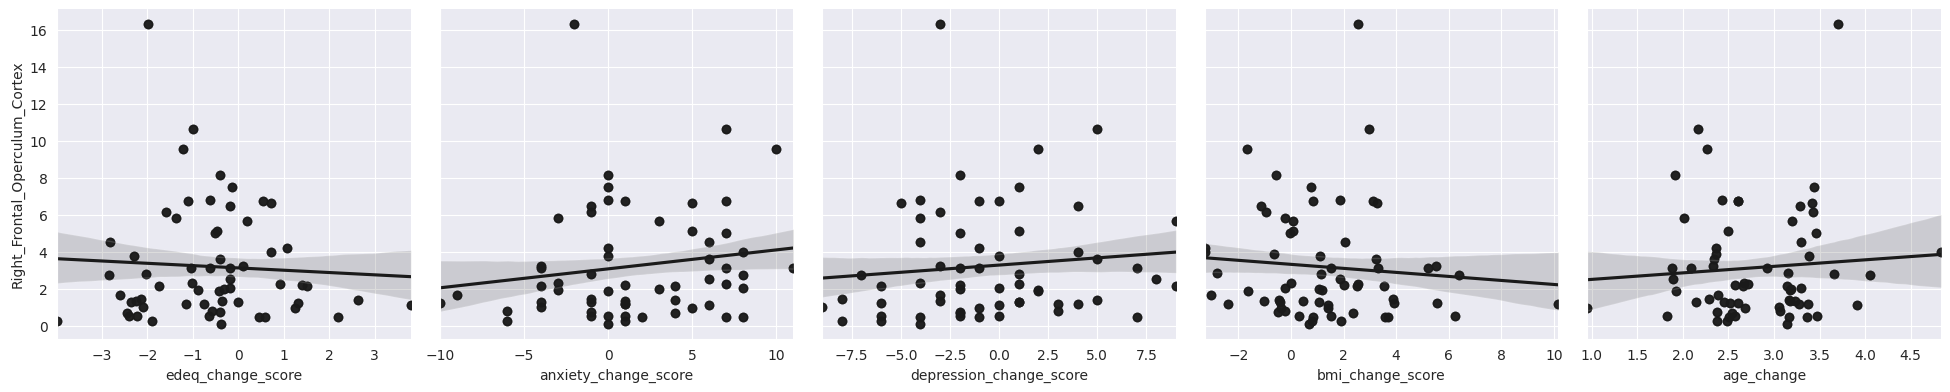

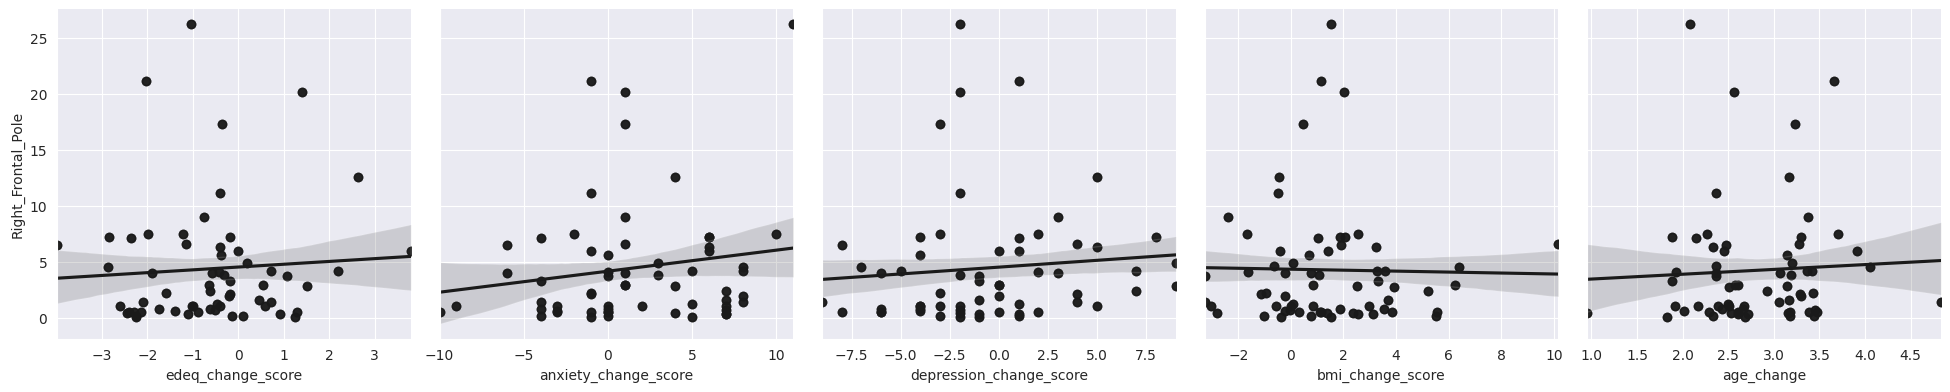

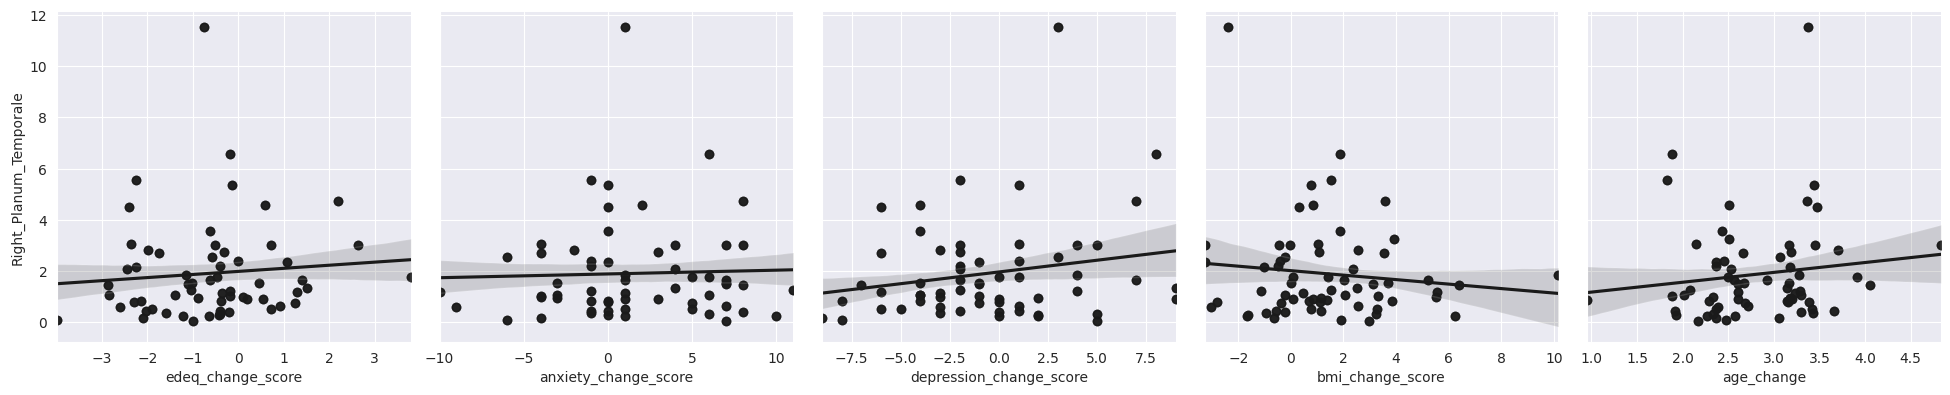

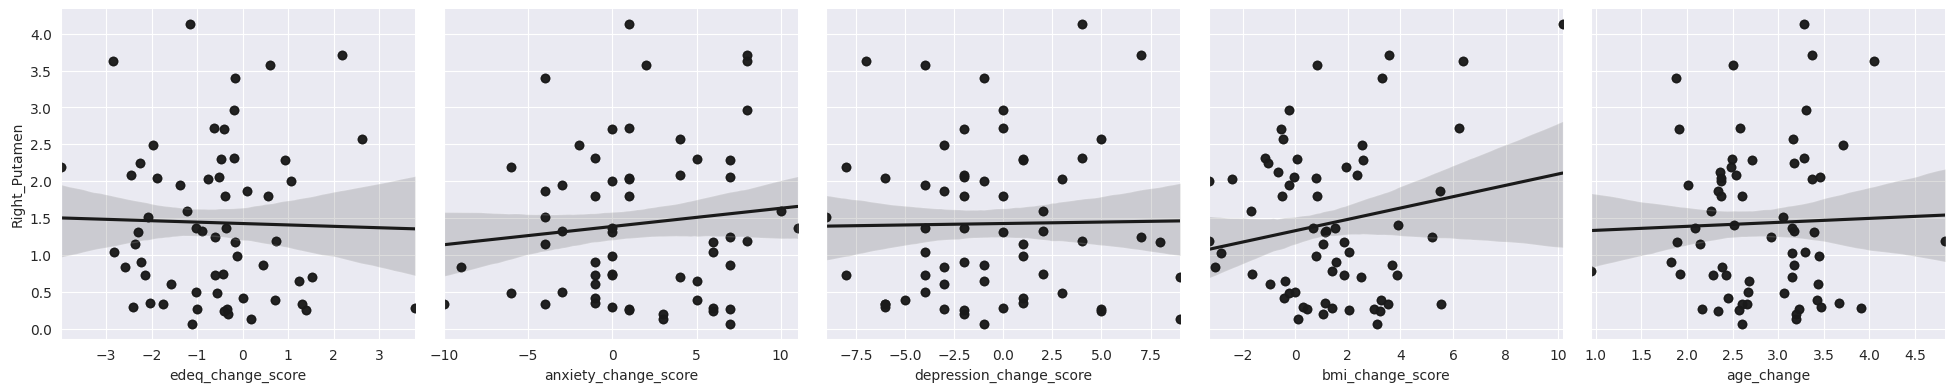

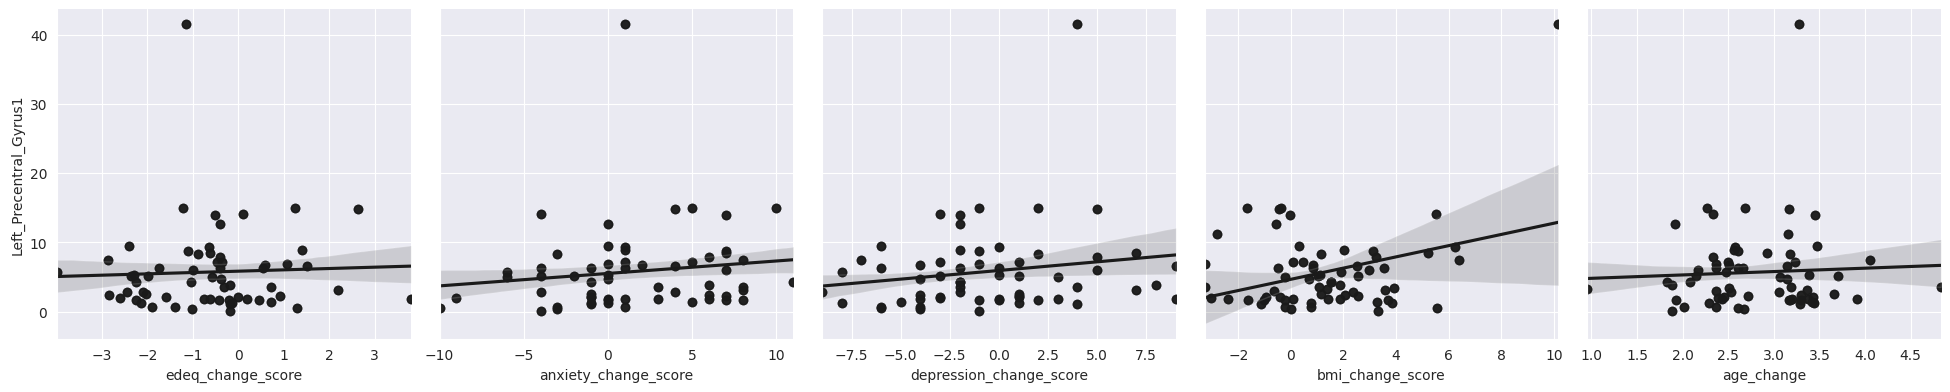

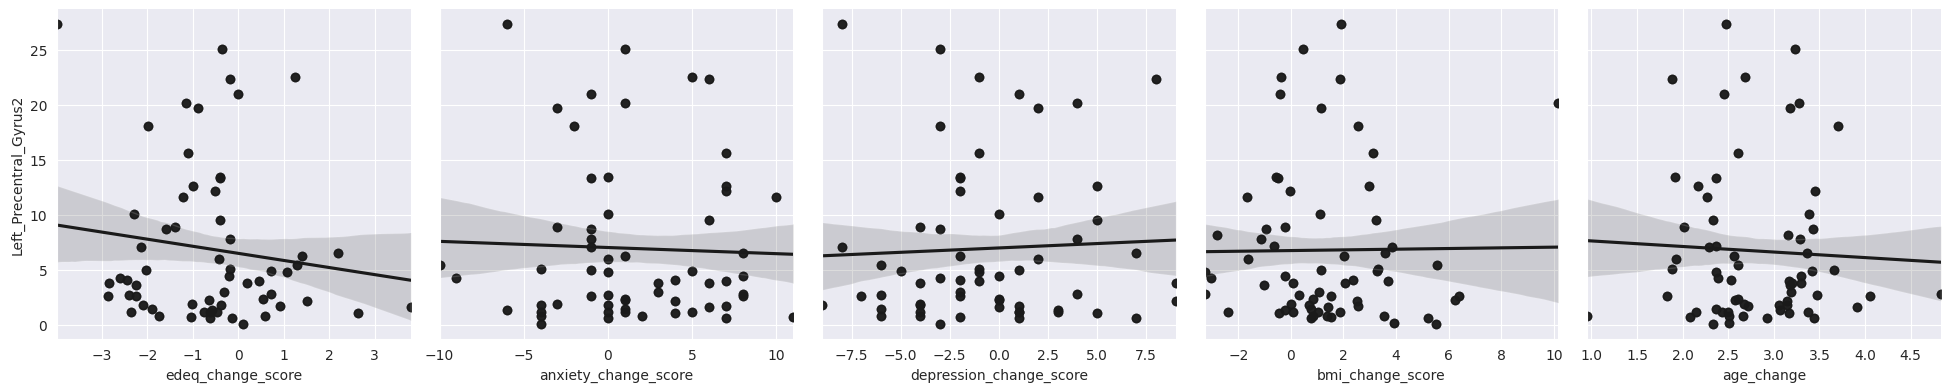

In [8]:
data = pd.concat((an_eft, an_corr[['edeq_change_score', 'anxiety_change_score', 'depression_change_score','bmi_change_score', 'age_change']]), axis=1)
for cluster in data.iloc[:,4:10].columns:
    plots = sns.PairGrid(data, y_vars=[cluster], x_vars=['edeq_change_score', 'anxiety_change_score', 'depression_change_score','bmi_change_score', 'age_change'], height=4)
    plots.map(sns.regplot, color=".1")

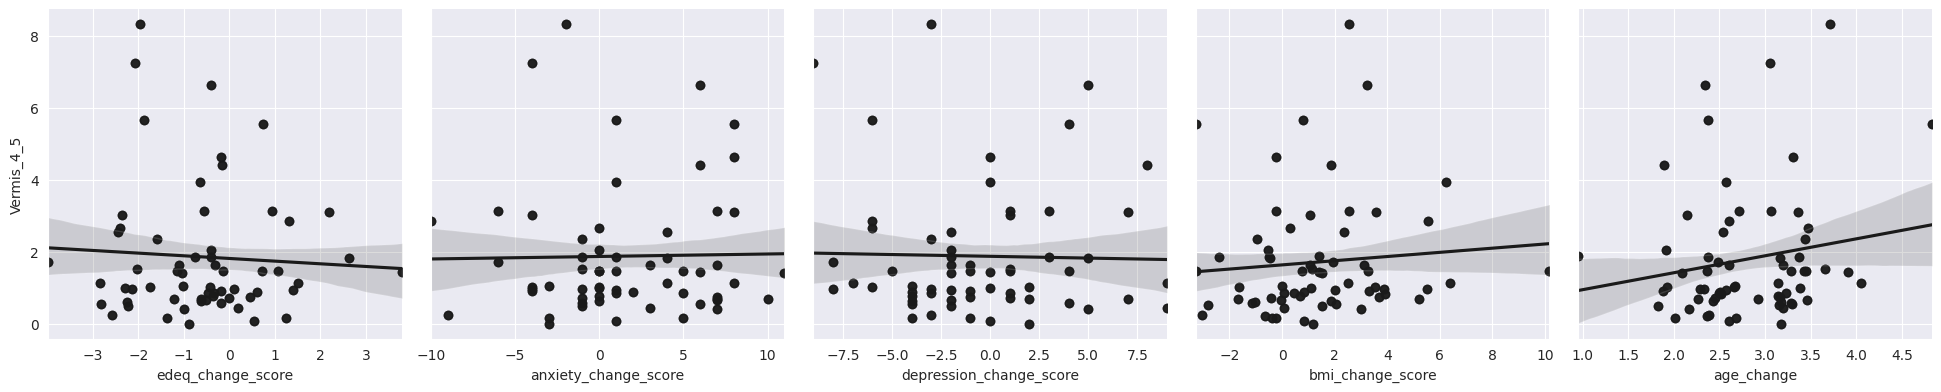

In [9]:
data = pd.concat((an_happy, an_corr[['edeq_change_score', 'anxiety_change_score', 'depression_change_score','bmi_change_score', 'age_change']]), axis=1)
plots = sns.PairGrid(data, y_vars=['Vermis_4_5'], x_vars=['edeq_change_score', 'anxiety_change_score', 'depression_change_score','bmi_change_score', 'age_change'], height=4)
plots.map(sns.regplot, color=".1")